In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import pandas as pd
from IPython.display import display, HTML

In [ ]:
#T_check = [247150736,249755492,253190876,256826632,260167178,263614054,266573306,269829837,273132570,276334433,279733277,284968955,287625193,290107933,292805298,295516599,298379912,301231207,304093966,306771529,309047613.5,311718857,314102623,316427395,318907401,321418820]

In [7]:
#Using the "truth" population data 
data_range = range(1990,2015)

#Using the "truth" population data 
def find_worker_retiree_populations_truth(workers, retirees):
    """Produces dictionary: (year, group)-> population where groups are 'W','R', or 'C'"""
    p = pd.read_csv('data/PopulationDataIndividualAge.csv')
    p['Age_Group'] = 'O'
    p.loc[np.logical_and(p['AGE LOWER'] >= workers[0],p['AGE UPPER'] <= workers[1]), 'Age_Group'] = 'W'
    p.loc[p['AGE UPPER'] < workers[0], 'Age_Group'] = 'C'
    p.loc[p['AGE LOWER'] >= retirees, 'Age_Group'] = 'R' 
    del p['AGE UPPER']
    del p['AGE LOWER']

    pop = p.groupby(['YEAR',"Age_Group"]).sum()
    return pop.to_dict()['POPULATION']


def plot_actual_versus_predicted(workers, retirement_age, start_year, n_years, method_name, predicted_pop, filename):
    pop = find_worker_retiree_populations_truth(workers, retirement_age)
    predicted_pop = predicted_pop
    
    year_range = range(1990,2016,5)

    R = []
    R_pred = []
    W = []
    W_pred = []
    C = []
    C_pred = []
    for year in year_range:
        R.append(pop[(year,'R')])
        R_pred.append(predicted_pop[(year,'R')])
        C.append(pop[(year,'C')])
        C_pred.append(predicted_pop[(year,'C')])
        W.append(pop[(year,'W')])
        W_pred.append(predicted_pop[(year,'W')])

        
    plt.plot(year_range,C,label='true child population', color="blue")
    plt.plot(year_range,W,label='true worker population', color="red")
    plt.plot(year_range,R,label='true retiree population', color="green")
    plt.plot(year_range,C_pred, color="blue", label=method_name+' child population', ls='--')
    plt.plot(year_range,W_pred, color="red", label=method_name+' worker population', ls='--')
    plt.plot(year_range,R_pred, color="green", label=method_name+' retiree population', ls='--')
    leg = plt.legend(bbox_to_anchor=(1.8,0.5),loc = 'center right')
    plt.ylabel('Population in Age Bucket')
    plt.xlabel('Year')
    
    plt.savefig(filename+'.png' ,bbox_extra_artists=(leg,), bbox_inches='tight')
    
   

## Visualize True change in Group Populations

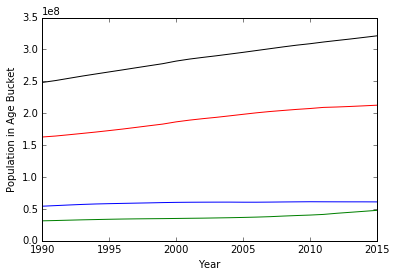

In [8]:
pop = find_worker_retiree_populations_truth([15,64], 65)

year_range = range(1990,2016)

R = []
W = []
C = []
T = []
for year in year_range:
    R.append(pop[(year,'R')])
    C.append(pop[(year,'C')])
    W.append(pop[(year,'W')])
    T.append(pop[(year,'R')]+pop[(year,'W')]+pop[(year,'C')])

#T_check = [247150736,249755492,253190876,256826632,260167178,263614054,266573306,269829837,273132570,276334433,279733277,284968955,287625193,290107933,292805298,295516599,298379912,301231207,304093966,306771529,309047613.5,311718857,314102623,316427395,318907401,321418820]
plt.plot(year_range,C,label='true child population', color="blue")
plt.plot(year_range,W,label='true worker population', color="red")
plt.plot(year_range,R,label='true retiree population', color="green")
plt.plot(year_range, T, label='predicted total population',color='black')

#plt.legend(loc = 'upper left')
plt.ylabel('Population in Age Bucket')
plt.xlabel('Year')

## Leslie Predictions

In [11]:
def find_worker_retiree_populations_leslie(workers, retirees):
    """Produces dictionary: (year, group)-> population where groups are 'W','R', or 'C'"""
    global data_range
    
    #p = pd.read_csv('data/leslie_results.csv')
    p = pd.read_csv('data/leslie_results_1990.csv')
    p['Age_Group'] = 'O'
    p.loc[np.logical_and(p['Age_Lower'] >= workers[0],p['Age_Upper'] <= workers[1]), 'Age_Group'] = 'W'
    p.loc[p['Age_Upper'] < workers[0], 'Age_Group'] = 'C'
    p.loc[p['Age_Lower'] >= retirees, 'Age_Group'] = 'R'    
    del p['Age_Upper']
    del p['Age_Lower']

    data_range = range(min(p['Year']),max(p['Year'])+1)
    pop = p.groupby(['Year',"Age_Group"]).sum()
    return pop.to_dict()['Population']

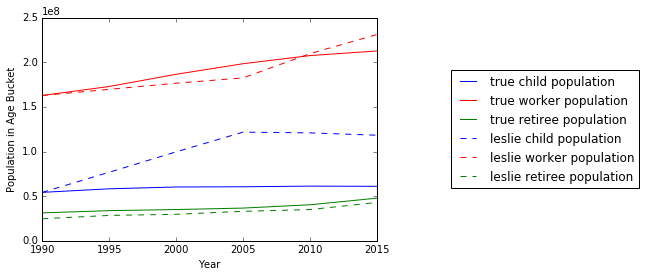

In [13]:
predicted_pop = find_worker_retiree_populations_leslie([15,64], 65)
n_years= 2016-1990
plot_actual_versus_predicted([15,64], 64, 1990, n_years , 'leslie', predicted_pop, 'leslie_pop')

## ODE

In [6]:
def find_worker_retiree_populations_ODE(workers, retirees):
    """Produces dictionary: (year, group)-> population where groups are 'W','R', or 'C'"""
    global data_range 
    
    p = pd.read_csv('data/ODE/ode_results_1990_new.csv')
    pop = p.groupby(['Year',"Group"]).sum()
    data_range = range(min(p['Year']),max(p['Year'])+1)
    return pop.to_dict()['Population']



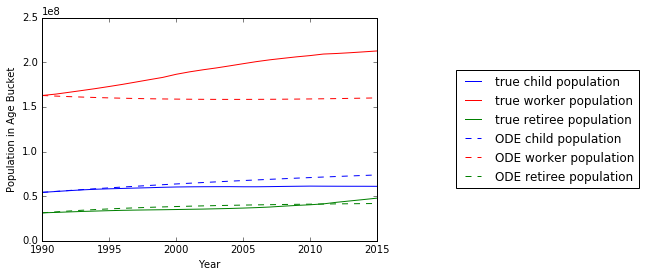

In [7]:
predicted_pop = find_worker_retiree_populations_ODE([15,64], 65)
n_years= 2016-1990
plot_actual_versus_predicted([15,64], 64, 1990, n_years , 'ODE', predicted_pop, 'ode_pop')

## PDE

In [34]:
def find_worker_retiree_populations_PDE(workers, retirees):
    """Produces dictionary: (year, group)-> population where groups are 'W','R', or 'C'"""
    global data_range 
    
    p = pd.read_csv('data/PDE/pde_project_from_1990.csv')
    p['Age_Group'] = 'O'
    p.loc[np.logical_and(p['AGELOW'] >= workers[0],p['AGEHIGH'] <= workers[1]), 'Age_Group'] = 'W'
    p.loc[p['AGEHIGH'] < workers[0], 'Age_Group'] = 'C'
    p.loc[p['AGELOW'] >= retirees, 'Age_Group'] = 'R'    
    del p['AGEHIGH']
    del p['AGELOW']
    del p['Unnamed: 0']
    del p['POPULATION']
    del p['AGE GROUP']
    
    pop = p.groupby(['YEAR',"Age_Group"]).sum()
    data_range = range(min(p['YEAR']),max(p['YEAR'])+1)
    return pop.to_dict()['POPPROJ']



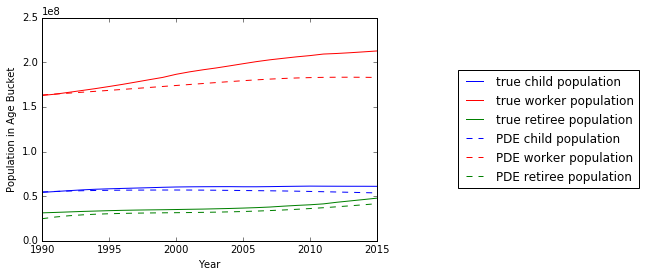

In [46]:
predicted_pop = find_worker_retiree_populations_PDE([15,64], 65)
n_years= 2016-1990
plot_actual_versus_predicted([15,64], 64, 1990, n_years , 'PDE', predicted_pop, 'pde_pop')